In [1]:
import pandas as pd
import geopandas as gpd
import fiona


In [2]:
#use fiona to help read geopandas read the file
# notice the description column is html

gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
df = gpd.read_file('AllBitou20b.kml', driver='KML')
df

C:\Users\dwhew\anaconda3\envs\bitou\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


,Name,Description,geometry
0,Bitou bush,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",POINT Z (153.13481 -26.71795 0.00000)
1,Bitou bush,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",POINT Z (153.43067 -27.31563 0.00000)
2,Bitou bush,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",POINT Z (153.42508 -27.30358 0.00000)
3,Bitou bush,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",POINT Z (153.11057 -25.56516 0.00000)
4,Bitou bush,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",POINT Z (153.08553 -25.76300 0.00000)
...,...,...,...
2455,Bitou bush,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",POINT Z (153.43967 -27.76958 0.00000)
2456,Bitou bush,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",POINT Z (153.43592 -27.78790 0.00000)
2457,Bitou bush,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",POINT Z (153.43988 -27.77067 0.00000)
2458,Bitou bush,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",POINT Z (153.44021 -27.77354 0.00000)


In [3]:
#again showing the html string in 'Description'
df['Description'][0]

'<html xmlns:fo="http://www.w3.org/1999/XSL/Format" xmlns:msxsl="urn:schemas-microsoft-com:xslt"> <head> <META http-equiv="Content-Type" content="text/html"> <meta http-equiv="content-type" content="text/html; charset=UTF-8"> </head> <body style="margin:0px 0px 0px 0px;overflow:auto;background:#FFFFFF;"> <table style="font-family:Arial,Verdana,Times;font-size:12px;text-align:left;width:100%;border-collapse:collapse;padding:3px 3px 3px 3px"> <tr style="text-align:center;font-weight:bold;background:#9CBCE2"> <td>Bitou bush</td> </tr> <tr> <td> <table style="font-family:Arial,Verdana,Times;font-size:12px;text-align:left;width:100%;border-spacing:0px; padding:3px 3px 3px 3px"> <tr> <td>FID</td> <td>0</td> </tr> <tr bgcolor="#D4E4F3"> <td>Activity</td> <td>Infestation</td> </tr> <tr> <td>ActivityDa</td> <td>1/03/2015</td> </tr> <tr bgcolor="#D4E4F3"> <td>ComName</td> <td>Bitou bush</td> </tr> <tr> <td>MonYr</td> <td>2015-03</td> </tr> <tr bgcolor="#D4E4F3"> <td>FinYr</td> <td>2014 - 2015</t

In [4]:
# create new df for the parsing to append to

desc_df = gpd.GeoDataFrame({ 
 'FID':[''],
 'Activity':[''],
 'ActivityDa':[''],
 'ComName':[''],
 'MonYr':[''],
 'FinYr':[''],
 'Detection1':[''],
 'Date_S':['']
})

In [5]:
# this loop will interate to parse all in descriptions, take the usefull information and append to df

for string in df['Description']:
    
    s = pd.read_html(string)   #read string
    s = s[1]                   #take just the html table (not the other  )
    s = s.T                    #transpose
    s.columns = s.iloc[0]      #assign the first row as the colum headers
    
    desc_df = desc_df.append(s.iloc[1])  #append only the values (keys are already provided above)
    

In [6]:
desc_df = desc_df.drop(0)       #not sure why the first row was blank
desc_df.index = df.index        #harmonaise the indexes
desc_df.drop(columns=['FID'])   

df = pd.concat([df, desc_df], axis=1)
df

,Name,Description,geometry,FID,Activity,ActivityDa,ComName,MonYr,FinYr,Detection1,Date_S
0,Bitou bush,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",POINT Z (153.13481 -26.71795 0.00000),0,Infestation,1/03/2015,Bitou bush,2015-03,2014 - 2015,<Null>,Jan15_Jun15
1,Bitou bush,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",POINT Z (153.43067 -27.31563 0.00000),1,Infestation,25/03/2015,Bitou bush,2015-03,2014 - 2015,<Null>,Jan15_Jun15
2,Bitou bush,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",POINT Z (153.42508 -27.30358 0.00000),2,Infestation,25/03/2015,Bitou bush,2015-03,2014 - 2015,<Null>,Jan15_Jun15
3,Bitou bush,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",POINT Z (153.11057 -25.56516 0.00000),3,Infestation,1/05/2015,Bitou bush,2015-05,2014 - 2015,<Null>,Jan15_Jun15
4,Bitou bush,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",POINT Z (153.08553 -25.76300 0.00000),4,Infestation,29/04/2015,Bitou bush,2015-04,2014 - 2015,<Null>,Jan15_Jun15
...,...,...,...,...,...,...,...,...,...,...,...
2455,Bitou bush,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",POINT Z (153.43967 -27.76958 0.00000),3450,Survey,8/07/2020,Bitou bush,NaN,2019 - 2020,8/07/2020,Jan20 - Jun20
2456,Bitou bush,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",POINT Z (153.43592 -27.78790 0.00000),3451,Survey,8/07/2020,Bitou bush,NaN,2019 - 2020,8/07/2020,Jan20 - Jun20
2457,Bitou bush,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",POINT Z (153.43988 -27.77067 0.00000),3452,Survey,8/07/2020,Bitou bush,NaN,2019 - 2020,8/07/2020,Jan20 - Jun20
2458,Bitou bush,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",POINT Z (153.44021 -27.77354 0.00000),3453,Survey,8/07/2020,Bitou bush,NaN,2019 - 2020,8/07/2020,Jan20 - Jun20


In [7]:
df['Activity'].unique()

#this is intersting, this might make it hard to work out what bushes are present at one time and which entries are the same bush 

array(['Infestation', 'Treatment', 'InfestTreat', 'Survey'], dtype=object)

<AxesSubplot:>

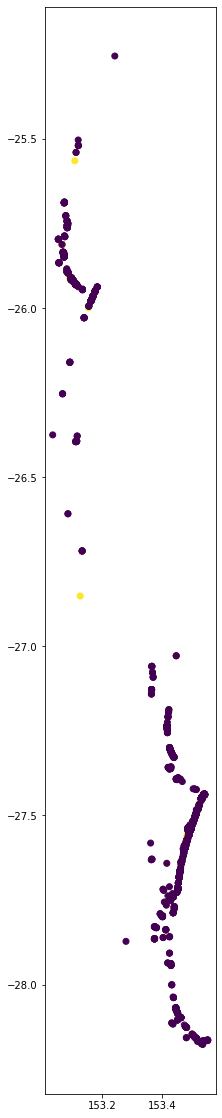

In [11]:
df.plot(df['Activity'] == 'Infestation', figsize=(20, 20))